In [1]:
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree

In [2]:
data = pd.DataFrame({
    'prec': [2,1,2,1,0,0],
    'velo_prod': [1,0,2,2,0,1],
    'tx_retralho': [0,2,0,0,2,2],
    'classif': ['alta qualidade','baixa qualidade','alta qualidade','alta qualidade','baixa qualidade','baixa qualidade']
})

Acurácia: 0.5
Matrix: [[1 0]
 [1 0]]
Precisão: 0.5


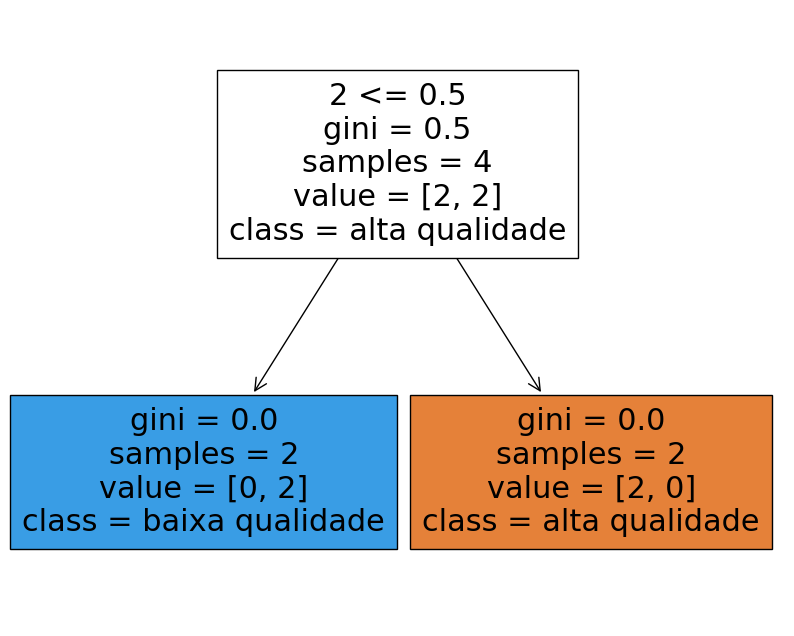

In [3]:
x=np.array(data['prec']) # pega a coluna tempo do dataframe
y=np.array(data['classif']) # pega a coluna de classificação do dataframe
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),y.reshape(-1,1),
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
precisao = precision_score(y_teste,prev,pos_label='alta qualidade')
matrix = confusion_matrix(y_teste,prev)
print(f"Acurácia: {acurracy}")
print(f"Matrix: {matrix}")
print(f"Precisão: {precisao}")
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=x.tolist(),class_names=y.tolist(),filled=True)
plt.show()

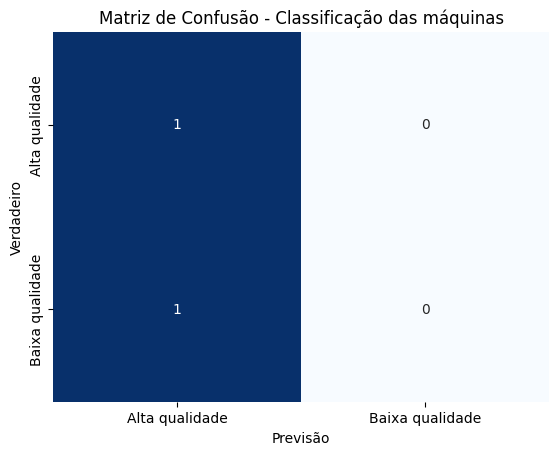

In [4]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Alta qualidade','Baixa qualidade'],yticklabels=['Alta qualidade','Baixa qualidade'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()